# Exercise 6 - Artificial Neural Networks Introduction

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import sklearn.datasets
pd.options.mode.chained_assignment = None  # Ignore python warnings 
# If you are unable to load the tensorflow library, you might find a solution here: https://www.youtube.com/watch?v=CMYE6wMBx40

In [3]:
def plot_data(X,y):
    # create plot
    fig, ax = plt.subplots()
    scatter1 = plt.scatter(X[:,0],X[:,1],c = y) # Plot the new sample

    # produce a legend with the unique colors from the scatter
    legend = ax.legend(*scatter1.legend_elements(),loc="upper left", title="Clusters")
    ax.add_artist(legend)

    # name the axis
    plt.xlabel('x1')
    plt.ylabel('x2')

## Task 1. Binary MLP classifier

### 1.1 Data preparation
Import make_circles from sklearn.datasets and generate a dataset X,y (setting noise to 0.2, factor to 0.5 and random_state to 1), plot the data via the function plot_data(X,y) and print the shape of X.

(100, 2)

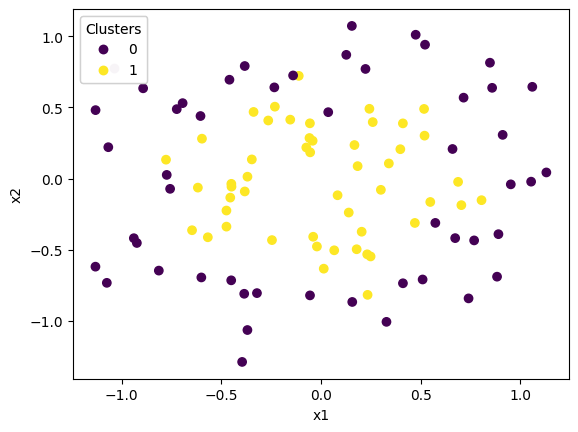

In [4]:
X , y = sklearn.datasets.make_circles(noise = 0.2, factor = 0.5, random_state = 1)
plot_data(X,y)
X.shape

### 1.2 Normalize the data (if necessary) and perform a train_test_split (ratio 90% training data, set stratify equal to y).

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X , y, test_size=0.1, stratify = y)

### 1.3 Define an ANN architecture
Use an architecture with one hidden layer and 30 neurons and create the model. Use the Tensorflow functional model. Read the API reference here:
https://www.tensorflow.org/guide/keras/functional

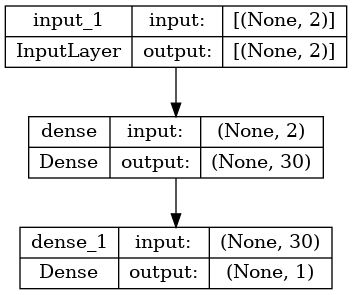

In [6]:
n_classes = len(np.unique(y))
m,n = X_train.shape
inputs = keras.Input(shape=(n,))
layer_1 = layers.Dense(30, activation="relu") (inputs)
outputs = layers.Dense(1, activation = "sigmoid") (layer_1)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
keras.utils.plot_model(model, "my_first_model.png",show_shapes=True)

### 1.4 Define the cost function to train the model

In [7]:
model.compile(
    loss = "binary_crossentropy",
    metrics=["accuracy"]
)

### 1.5 Calculate the number of parameters in each layer (with pen and paper).

In [8]:
# weight input layer + bias input layer + weight hidden layer + bias hidden layer
# 90 + 30 + 1 = 121

### 1.6 Summarize the model with model1.summary()

In [9]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 30)                90        
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### 1.7 Train the model 
Choose 500 epochs and a batch_size=64 and set verbose to 2 to see the accuracy over epochs. Set the training function equal to historty.

In [10]:
from numpy.random import seed
tf.random.set_seed(2)

history = model.fit(X_train, y_train, batch_size=64, epochs=500, validation_data = (X_test, y_test))

Epoch 1/500
2/2 [==============================] - 1s 175ms/step - loss: 0.6739 - accuracy: 0.5000 - val_loss: 0.6867 - val_accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 0.6713 - accuracy: 0.5000 - val_loss: 0.6861 - val_accuracy: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 21ms/step - loss: 0.6699 - accuracy: 0.5000 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 23ms/step - loss: 0.6690 - accuracy: 0.5000 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 24ms/step - loss: 0.6677 - accuracy: 0.5000 - val_loss: 0.6842 - val_accuracy: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 0.6669 - accuracy: 0.5000 - val_loss: 0.6836 - val_accuracy: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 23ms/step - loss: 0.6660 - accuracy: 0.5000 - val_loss: 0.6831 - val_accuracy: 0.5000
Epoch 8/500
2/2 [==

In [11]:
def plot_loss(history):
    fig, ax = plt.subplots(2)

    ax[0].plot(history.history['loss'], label='loss')
    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].grid()
    
    ax[1].plot(history.history['accuracy'], label='acc')
    ax[1].plot(history.history['val_accuracy'], label='val_acc')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Acc')
    ax[1].set_ylim([0, 1])
    ax[1].grid()
    plt.legend()
    plt.grid(True)

### 1.8 Call plot_loss() with the history.

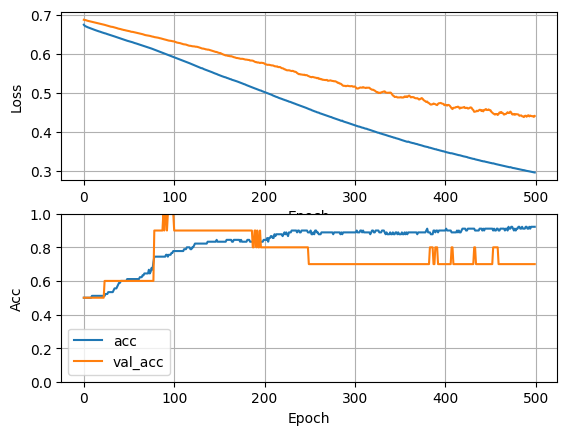

In [12]:
plot_loss(history)

## Task 2. MLP regressor

### 2.1 Data Preparation
Run the code below

In [13]:
from sklearn.preprocessing import Normalizer
from sklearn.datasets import fetch_california_housing

# Data to predict the price of a house 
housing = fetch_california_housing()
X,y = housing['data'], housing['target']
feature_names = housing['feature_names']
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [14]:
 # Normalize data
X= Normalizer().fit_transform(X)
print(X)

[[ 0.0238481   0.1174473   0.02000651 ...  0.00732056  0.10850985
  -0.3501362 ]
 [ 0.00345241  0.00873354  0.00259434 ...  0.00087745  0.01574533
  -0.05082923]
 [ 0.01409202  0.10097076  0.01609345 ...  0.00544128  0.07349506
  -0.23735895]
 ...
 [ 0.00167455  0.01674553  0.00512762 ...  0.00229082  0.03883978
  -0.11940547]
 [ 0.00248251  0.02393168  0.00708579 ...  0.00282289  0.05242368
  -0.16129955]
 [ 0.00171478  0.0114864   0.00377236 ...  0.00187873  0.02826371
  -0.08703817]]


### 2.2 Define the architecture with 10 neurons in one hidden layer and create the model (use the functional model)

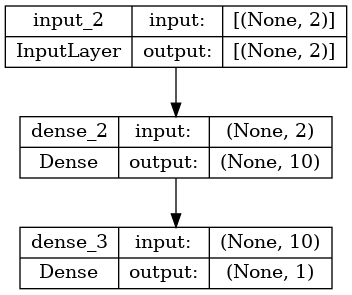

In [15]:
n_classes = len(np.unique(y))
m,n = X_train.shape
inputs = keras.Input(shape=(n,))
layer_1 = layers.Dense(10, activation="relu") (inputs)
outputs = layers.Dense(1, activation = "sigmoid") (layer_1)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
keras.utils.plot_model(model, "my_first_model.png",show_shapes=True)

### 2.3 Define the cost function to train the model (for loss use mean absolute error, for metrics MSE) and compile the model

In [16]:
model.compile(loss = 'mean_absolute_error', metrics = 'MSE')

### 2.4 Look at the model summary of the model

In [17]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


### 2.5 Train the model with batch_size=64, set epoch number to 500 and set verbose to 2

In [18]:
from numpy.random import seed
tf.random.set_seed(2)

history = model.fit(X_train, y_train, batch_size=64, epochs=500, validation_data = (X_test, y_test), verbose= 2)

Epoch 1/500
2/2 - 0s - loss: 0.5145 - MSE: 0.2700 - val_loss: 0.4927 - val_MSE: 0.2465 - 489ms/epoch - 245ms/step
Epoch 2/500
2/2 - 0s - loss: 0.5136 - MSE: 0.2688 - val_loss: 0.4923 - val_MSE: 0.2460 - 24ms/epoch - 12ms/step
Epoch 3/500
2/2 - 0s - loss: 0.5131 - MSE: 0.2682 - val_loss: 0.4922 - val_MSE: 0.2458 - 25ms/epoch - 13ms/step
Epoch 4/500
2/2 - 0s - loss: 0.5128 - MSE: 0.2679 - val_loss: 0.4919 - val_MSE: 0.2454 - 24ms/epoch - 12ms/step
Epoch 5/500
2/2 - 0s - loss: 0.5123 - MSE: 0.2673 - val_loss: 0.4916 - val_MSE: 0.2452 - 23ms/epoch - 12ms/step
Epoch 6/500
2/2 - 0s - loss: 0.5120 - MSE: 0.2669 - val_loss: 0.4914 - val_MSE: 0.2449 - 24ms/epoch - 12ms/step
Epoch 7/500
2/2 - 0s - loss: 0.5118 - MSE: 0.2666 - val_loss: 0.4912 - val_MSE: 0.2447 - 24ms/epoch - 12ms/step
Epoch 8/500
2/2 - 0s - loss: 0.5115 - MSE: 0.2663 - val_loss: 0.4910 - val_MSE: 0.2445 - 26ms/epoch - 13ms/step
Epoch 9/500
2/2 - 0s - loss: 0.5112 - MSE: 0.2660 - val_loss: 0.4907 - val_MSE: 0.2441 - 23ms/epoch - 

In [19]:
def plot_loss_reg(history):
    fig, ax = plt.subplots(2)

    ax[0].plot(history.history['loss'], label='loss')
    ax[0].plot(history.history['val_loss'], label='val_loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].grid()
    
    ax[1].plot(history.history['mse'], label='acc')
    ax[1].plot(history.history['val_mse'], label='val_acc')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('mse')
    ax[1].grid()
    
    plt.legend()
    plt.grid(True)

### 2.6 Plot training results using the code above

KeyError: 'mse'

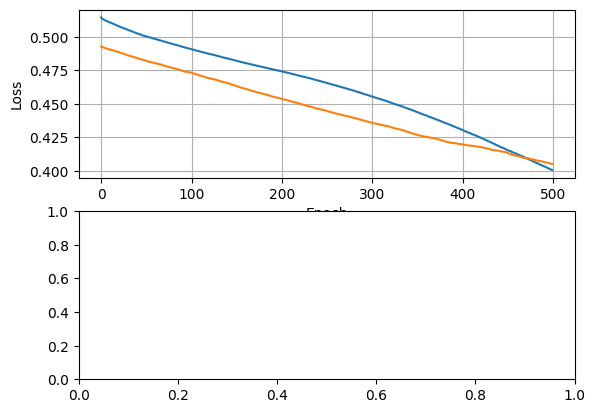

In [22]:
plot_loss_reg(history)